
## Shoreline Transformational Adaptation: Forward Looking Nature-based Climate Resilience


America’s coastal communities and infrastructure are threatened by extreme weather events and climate
change is accentuating these impacts. The Commonwealth of Virginia has already been transformed by
chronic high tide flooding and coastal erosion. Our proposed vision for a Shoreline Transformational
Adaptation brings together a unique team of Mason researchers to support the development of the next
generation of forward-looking, nature-inspired, coastal protection systems, integrating key Mason research
initiatives towards adapting our coastlines and communities to live with more water. Our proposed
framework recognizes the fundamental need for innovation and entrepreneurship to create the next
generation of nature-inspired innovative coastal protection systems provided by the RISE Rural and Urban
Coastal Community Resilience Challenge projects. To support this effort, the Mason Flood Hazards
Research Lab, the Center for Ocean-Land-Atmosphere Studies and the Business for a Better World Center
will: 1) develop engineering and scientific validation of the RISE innovative solutions providing the
foundation for widespread implementation for coastal protection at scale; 2) provide support for a forwardlooking design strategy ensuring that the proposed alternatives are resilient to extreme events and future
climate conditions; and 3) provide support to translate pilot studies to a greater market and communities
and to mitigate barriers related to social acceptance and adoption.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pathlib as pl;            import numpy as np
import netCDF4 as nc4;           import pandas as pd
import matplotlib.pyplot as plt; import xarray as xr
import json;                     import requests
import plotly.graph_objs as go;  import matplotlib as mpl
import geopandas as gpd;         
from random import randint
from chart_studio import plotly
from plotly.offline import plot,iplot, init_notebook_mode
from shapely import Polygon,Point,LineString
from rosely import WindRose
from matplotlib.lines import Line2D

---
### ADCP Marsh

In [2]:
root = pl.Path('/Users/tmiesse/work/FHRL/seagrant/field')
file = pd.read_excel(root / 'boat_runs_with_PWH.xlsx')
file.head()

,Pairs,Senson ID Before,Sensor ID After,Weight,Speed,Peak Wave Height (m) Before,Peak Wave Height (m) After,mean_bf,mean_af
0,1,GMU05,GMU01,Heavy,Slow,0.0589,0.0150,0.159467,0.273017
1,1,GMU05,GMU01,Heavy,Medium,0.1896,0.3869,NaN,NaN
2,1,GMU05,GMU01,Heavy,Fast,0.2018,0.4712,NaN,NaN
3,1,GMU05,GMU01,Light,Slow,0.0368,0.0252,NaN,NaN
4,1,GMU05,GMU01,Light,Medium,0.2741,0.3610,NaN,NaN


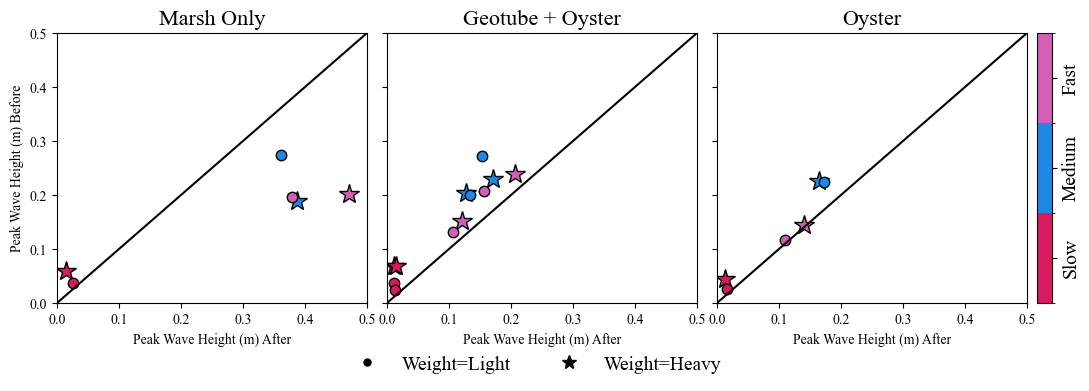

In [3]:
params = {'1':{'Heavy':'*','Light':'.','Slow':'#D81B60','Medium':'#1E88E5','Fast':'#D35FB7'},
          '2':{'Heavy':'*','Light':'.','Slow':'#D81B60','Medium':'#1E88E5','Fast':'#D35FB7'},
          '3':{'Heavy':'*','Light':'.','Slow':'#D81B60','Medium':'#1E88E5','Fast':'#D35FB7'},
          '4':{'Heavy':'*','Light':'.','Slow':'#D81B60','Medium':'#1E88E5','Fast':'#D35FB7'}}
cmap = (mpl.colors.ListedColormap(['#D81B60', '#1E88E5', '#D35FB7']))
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(10,3))
ax = [plt.axes([0.0,0.,0.31,0.9]),plt.axes([0.33,0.,0.31,0.9]),plt.axes([0.66,0.,0.31,0.9])]
bounds = [0,1, 2, 3]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
for f in file.index:
    if (file['Pairs'][f]==1):
        ax[0].plot(file['Peak Wave Height (m) After'][f],file['Peak Wave Height (m) Before'][f],params[str(file['Pairs'][f])][file['Weight'][f]],\
                color='k',markerfacecolor=params[str(file['Pairs'][f])][file['Speed'][f]],markersize=15,linewidth=0.1)
    elif (file['Pairs'][f]==2) or (file['Pairs'][f]==3):
        ax[1].plot(file['Peak Wave Height (m) After'][f],file['Peak Wave Height (m) Before'][f],params[str(file['Pairs'][f])][file['Weight'][f]],\
                color='k',markerfacecolor=params[str(file['Pairs'][f])][file['Speed'][f]],markersize=15)
    elif (file['Pairs'][f]==4):
        ax[2].plot(file['Peak Wave Height (m) After'][f],file['Peak Wave Height (m) Before'][f],params[str(file['Pairs'][f])][file['Weight'][f]],\
                color='k',markerfacecolor=params[str(file['Pairs'][f])][file['Speed'][f]],markersize=15)
for i in range(3):
    ax[i].plot([0,5],[0,5],'k')
    ax[i].set_xlim([0,0.5])
    ax[i].set_ylim([0,0.5])
    ax[i].set_xlabel('Peak Wave Height (m) After')

cbar_ax = fig.add_axes([0.98,0.,0.015,0.9])
sm =  mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(sm,cax = cbar_ax,orientation='vertical')
cbar.ax.set_yticks([0.5,1.5,2.5])
cbar.ax.set_yticklabels(['Slow','Medium','Fast'],fontsize = 14,rotation=90,verticalalignment='center')
myHandle = [Line2D([], [], marker='.', color='k', markersize=10, linestyle='None'),
          Line2D([], [], marker='*', color='k', markersize=10, linestyle='None')] ##Create custom handles for 2nd legend
ax[0].set_ylabel('Peak Wave Height (m) Before')
ax[1].set_yticklabels(['','','','','','']),ax[2].set_yticklabels(['','','','','',''])
ax[0].set_title('Marsh Only',fontsize=16),ax[1].set_title('Geotube + Oyster',fontsize=16),ax[2].set_title('Oyster',fontsize=16)
ax[0].legend(handles=myHandle,labels=['Weight=Light','Weight=Heavy'],loc='lower right', bbox_to_anchor=(2.2, -0.325),ncol=2,fontsize=14,frameon=False)

plt.show()

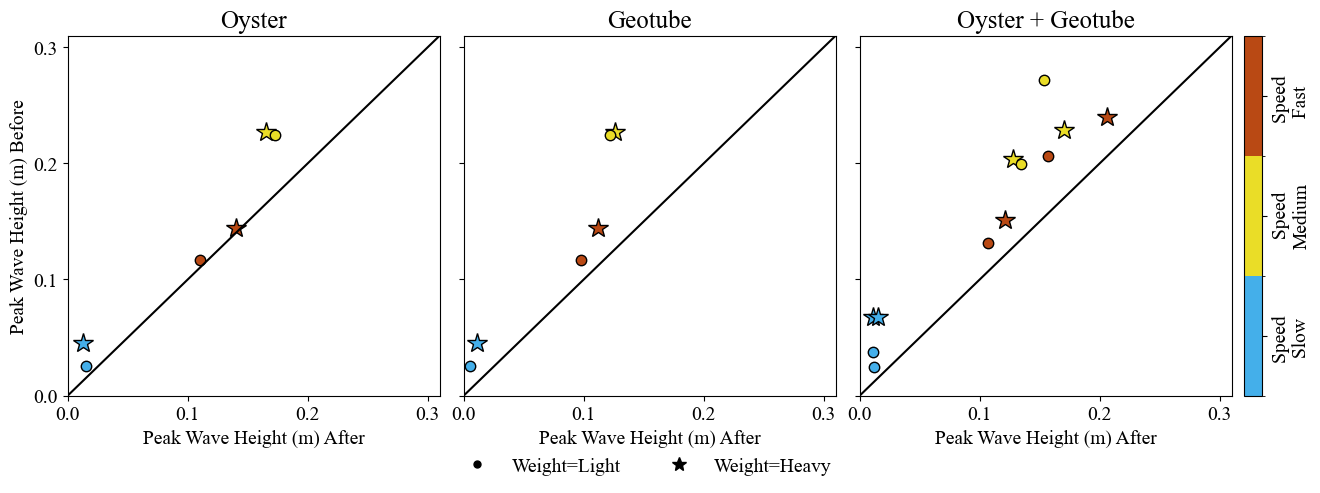

In [14]:
params = {'1':{'Heavy':'*','Light':'.','Slow':'#44AFEA','Medium':'#EADD27','Fast':'#B94914'},
          '2':{'Heavy':'*','Light':'.','Slow':'#44AFEA','Medium':'#EADD27','Fast':'#B94914'},
          '3':{'Heavy':'*','Light':'.','Slow':'#44AFEA','Medium':'#EADD27','Fast':'#B94914'},
          '4':{'Heavy':'*','Light':'.','Slow':'#44AFEA','Medium':'#EADD27','Fast':'#B94914'},
          '5':{'Heavy':'*','Light':'.','Slow':'#44AFEA','Medium':'#EADD27','Fast':'#B94914'}}
cmap = (mpl.colors.ListedColormap(['#44AFEA', '#EADD27', '#B94914']))
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(12,4))
ax = [plt.axes([0.0,0.,0.31,0.9]),plt.axes([0.33,0.,0.31,0.9]),plt.axes([0.66,0.,0.31,0.9])]
bounds = [0,1, 2, 3]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
for f in file.index:
    if (file['Pairs'][f]==5):
        ax[1].plot(file['Peak Wave Height (m) After'][f],file['Peak Wave Height (m) Before'][f],params[str(file['Pairs'][f])][file['Weight'][f]],\
                color='k',markerfacecolor=params[str(file['Pairs'][f])][file['Speed'][f]],markersize=15,linewidth=0.05)
    elif (file['Pairs'][f]==2) or (file['Pairs'][f]==3):
        ax[2].plot(file['Peak Wave Height (m) After'][f],file['Peak Wave Height (m) Before'][f],params[str(file['Pairs'][f])][file['Weight'][f]],\
                color='k',markerfacecolor=params[str(file['Pairs'][f])][file['Speed'][f]],markersize=15,linewidth=0.05)
    elif (file['Pairs'][f]==4):
        ax[0].plot(file['Peak Wave Height (m) After'][f],file['Peak Wave Height (m) Before'][f],params[str(file['Pairs'][f])][file['Weight'][f]],\
                color='k',markerfacecolor=params[str(file['Pairs'][f])][file['Speed'][f]],markersize=15,linewidth=0.05)
for i in range(3):
    ax[i].plot([0,5],[0,5],'k')
    ax[i].set_xlim([0,0.31])
    ax[i].set_ylim([0,0.31])
    ax[i].set_xlabel('Peak Wave Height (m) After',fontsize=14)
    ax[i].set_xticks([0,0.1,0.2,0.3]),ax[i].set_yticks([0,0.1,0.2,0.3])
    ax[i].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)
cbar_ax = fig.add_axes([0.98,0.,0.015,0.9])
sm =  mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(sm,cax = cbar_ax,orientation='vertical')
cbar.ax.set_yticks([0.5,1.5,2.5])
cbar.ax.set_yticklabels(['Speed \n Slow','  Speed\nMedium','Speed \n Fast'],fontsize = 14,rotation=90,verticalalignment='center')
myHandle = [Line2D([], [], marker='.', color='k', markersize=10, linestyle='None'),
          Line2D([], [], marker='*', color='k', markersize=10, linestyle='None')] ##Create custom handles for 2nd legend
ax[0].set_ylabel('Peak Wave Height (m) Before',fontsize=14)
ax[1].set_yticklabels(['','','','']),ax[2].set_yticklabels(['','','',''])
ax[1].set_title('Geotube',fontsize=18),ax[2].set_title('Oyster + Geotube',fontsize=18),ax[0].set_title('Oyster',fontsize=18)
ax[0].legend(handles=myHandle,labels=['Weight=Light','Weight=Heavy'],loc='lower right', bbox_to_anchor=(2.1, -0.27),ncol=2,fontsize=14,frameon=False)
plt.savefig('/Users/tmiesse/work/FHRL/seagrant/field/figures/metric_v2.png',bbox_inches='tight',pad_inches=0.1, dpi=750, transparent=True)

plt.show()

In [ ]:
file

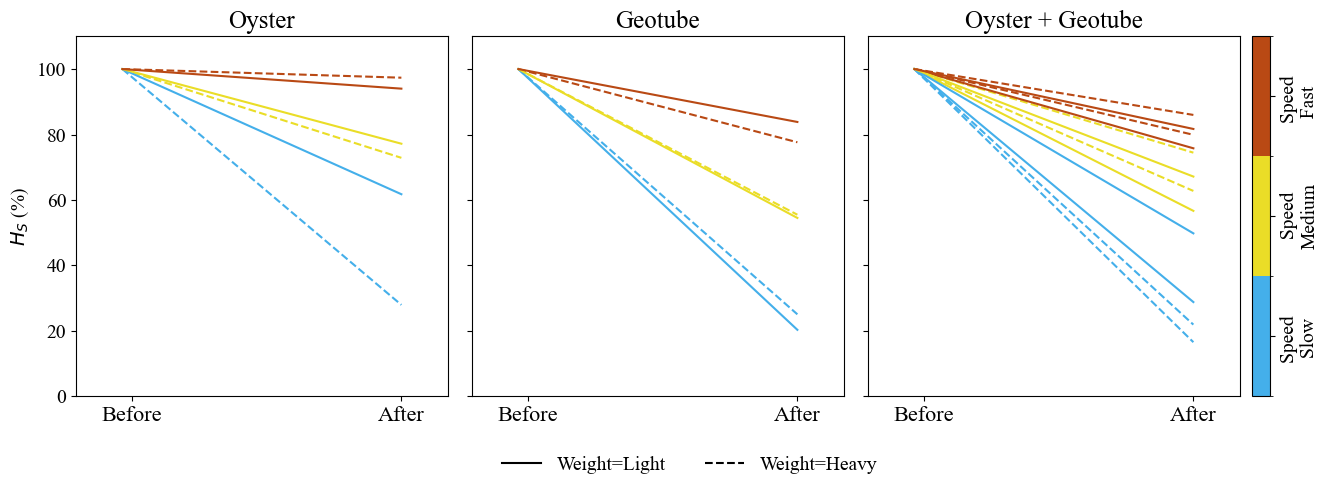

In [15]:
params = {'1':{'Heavy':'--','Light':'-','Slow':'#44AFEA','Medium':'#EADD27','Fast':'#B94914'},
          '2':{'Heavy':'--','Light':'-','Slow':'#44AFEA','Medium':'#EADD27','Fast':'#B94914'},
          '3':{'Heavy':'--','Light':'-','Slow':'#44AFEA','Medium':'#EADD27','Fast':'#B94914'},
          '4':{'Heavy':'--','Light':'-','Slow':'#44AFEA','Medium':'#EADD27','Fast':'#B94914'},
          '5':{'Heavy':'--','Light':'-','Slow':'#44AFEA','Medium':'#EADD27','Fast':'#B94914'}}
cmap = (mpl.colors.ListedColormap(['#44AFEA', '#EADD27', '#B94914']))
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(12,4))
ax = [plt.axes([0.0,0.,0.31,0.9]),plt.axes([0.33,0.,0.31,0.9]),plt.axes([0.66,0.,0.31,0.9])]
bounds = [0,1, 2, 3]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
for f in file.index:
    if (file['Pairs'][f]==5):
        hs = [100*(file['Peak Wave Height (m) Before'][f]/file['Peak Wave Height (m) Before'][f]),
              100*(file['Peak Wave Height (m) After'][f]/file['Peak Wave Height (m) Before'][f])]
        ax[1].plot([0.25,0.55],hs,
                color=params[str(file['Pairs'][f])][file['Speed'][f]],
                linestyle=params[str(file['Pairs'][f])][file['Weight'][f]],markersize=15,linewidth=1.5)
        
    elif (file['Pairs'][f]==2) or (file['Pairs'][f]==3):
        hs = [100*(file['Peak Wave Height (m) Before'][f]/file['Peak Wave Height (m) Before'][f]),
              100*(file['Peak Wave Height (m) After'][f]/file['Peak Wave Height (m) Before'][f])]
        ax[2].plot([0.25,0.55],hs,
                color=params[str(file['Pairs'][f])][file['Speed'][f]],
                linestyle=params[str(file['Pairs'][f])][file['Weight'][f]],markersize=15,linewidth=1.5)
    elif (file['Pairs'][f]==4):
        hs = [100*(file['Peak Wave Height (m) Before'][f]/file['Peak Wave Height (m) Before'][f]),
              100*(file['Peak Wave Height (m) After'][f]/file['Peak Wave Height (m) Before'][f])]
        ax[0].plot([0.25,0.55],hs,
                color=params[str(file['Pairs'][f])][file['Speed'][f]],
                linestyle=params[str(file['Pairs'][f])][file['Weight'][f]],markersize=15,linewidth=1.5)

for i in range(3):
    ax[i].set_xticks([0.26,0.55])
    ax[i].set_xlim([.2,.6])
    ax[i].set_ylim([0,110])
    ax[i].set_xticklabels(['Before','After'],fontsize=16)
    
    for label in ax[i].get_xticklabels(which='major'):
        label.set(rotation=0, horizontalalignment='center')
ax[0].tick_params(axis='y', labelsize=14)
cbar_ax = fig.add_axes([0.98,0.,0.015,0.9])
sm =  mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(sm,cax = cbar_ax,orientation='vertical')
cbar.ax.set_yticks([0.5,1.5,2.5])
cbar.ax.set_yticklabels(['Speed \n Slow','  Speed\nMedium','Speed \n Fast'],fontsize = 14,rotation=90,verticalalignment='center')
myHandle = [Line2D([], [], linestyle='-', color='k', markersize=10),
          Line2D([], [], linestyle='--', color='k', markersize=10)] ##Create custom handles for 2nd legend
ax[0].set_ylabel(r'$H_{S}$ (%)',fontsize=14)
ax[1].set_yticklabels(['','','','','','']),ax[2].set_yticklabels(['','','','','',''])
ax[1].set_title('Geotube',fontsize=18),ax[2].set_title('Oyster + Geotube',fontsize=18),ax[0].set_title('Oyster',fontsize=18)
ax[0].legend(handles=myHandle,labels=['Weight=Light','Weight=Heavy'],loc='lower right', bbox_to_anchor=(2.2, -0.265),ncol=2,fontsize=14,frameon=False)
plt.savefig('/Users/tmiesse/work/FHRL/seagrant/field/figures/percent_hs_v2.png',bbox_inches='tight',pad_inches=0.1, dpi=750, transparent=True)
plt.show()

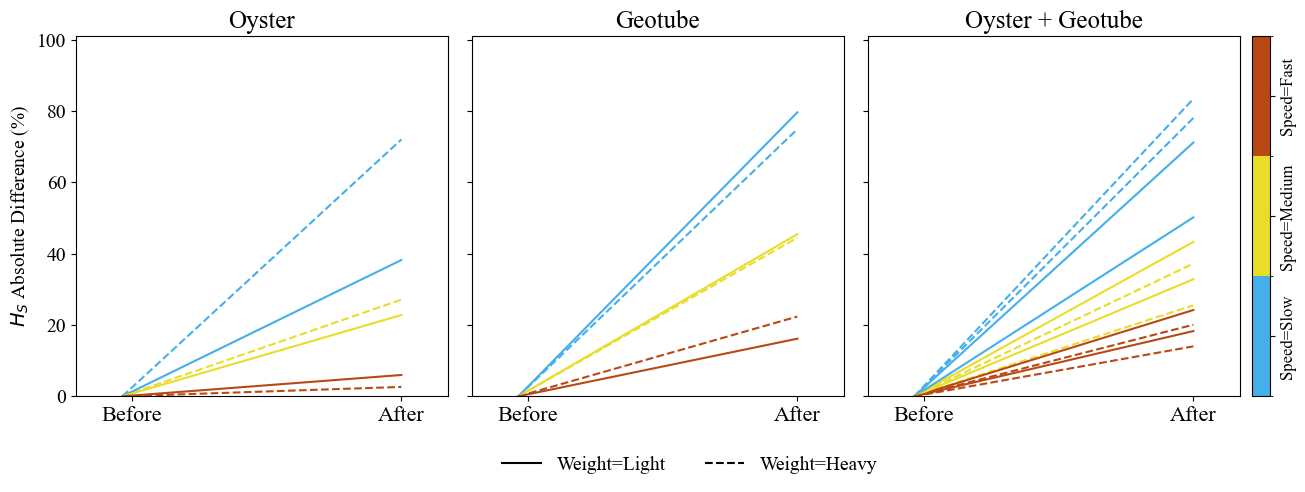

In [8]:
params = {'1':{'Heavy':'--','Light':'-','Slow':'#44AFEA','Medium':'#EADD27','Fast':'#B94914'},
          '2':{'Heavy':'--','Light':'-','Slow':'#44AFEA','Medium':'#EADD27','Fast':'#B94914'},
          '3':{'Heavy':'--','Light':'-','Slow':'#44AFEA','Medium':'#EADD27','Fast':'#B94914'},
          '4':{'Heavy':'--','Light':'-','Slow':'#44AFEA','Medium':'#EADD27','Fast':'#B94914'},
          '5':{'Heavy':'--','Light':'-','Slow':'#44AFEA','Medium':'#EADD27','Fast':'#B94914'}}
cmap = (mpl.colors.ListedColormap(['#44AFEA', '#EADD27', '#B94914']))
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(12,4))
ax = [plt.axes([0.0,0.,0.31,0.9]),plt.axes([0.33,0.,0.31,0.9]),plt.axes([0.66,0.,0.31,0.9])]
bounds = [0,1, 2, 3]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
for f in file.index:
    if (file['Pairs'][f]==5):
        hs0=100*(file['Peak Wave Height (m) Before'][f]/file['Peak Wave Height (m) Before'][f])
        hs = [np.abs(hs0-(100*(file['Peak Wave Height (m) Before'][f]/file['Peak Wave Height (m) Before'][f]))),
              np.abs(hs0-(100*(file['Peak Wave Height (m) After'][f]/file['Peak Wave Height (m) Before'][f])))]
        ax[1].plot([0.25,0.55],hs,
                color=params[str(file['Pairs'][f])][file['Speed'][f]],
                linestyle=params[str(file['Pairs'][f])][file['Weight'][f]],markersize=15,linewidth=1.5)
        
    elif (file['Pairs'][f]==2) or (file['Pairs'][f]==3):
        hs0=100*(file['Peak Wave Height (m) Before'][f]/file['Peak Wave Height (m) Before'][f])
        hs = [np.abs(hs0-(100*(file['Peak Wave Height (m) Before'][f]/file['Peak Wave Height (m) Before'][f]))),
              np.abs(hs0-(100*(file['Peak Wave Height (m) After'][f]/file['Peak Wave Height (m) Before'][f])))]
        ax[2].plot([0.25,0.55],hs,
                color=params[str(file['Pairs'][f])][file['Speed'][f]],
                linestyle=params[str(file['Pairs'][f])][file['Weight'][f]],markersize=15,linewidth=1.5)
    elif (file['Pairs'][f]==4):
        hs0=100*(file['Peak Wave Height (m) Before'][f]/file['Peak Wave Height (m) Before'][f])
        hs = [np.abs(hs0-(100*(file['Peak Wave Height (m) Before'][f]/file['Peak Wave Height (m) Before'][f]))),
              np.abs(hs0-(100*(file['Peak Wave Height (m) After'][f]/file['Peak Wave Height (m) Before'][f])))]
        ax[0].plot([0.25,0.55],hs,
                color=params[str(file['Pairs'][f])][file['Speed'][f]],
                linestyle=params[str(file['Pairs'][f])][file['Weight'][f]],markersize=15,linewidth=1.5)

for i in range(3):
    ax[i].set_xticks([0.26,0.55])
    ax[i].set_xlim([.2,.6])
    ax[i].set_ylim([0,101])
    ax[i].set_xticklabels(['Before','After'],fontsize=16)
    
    for label in ax[i].get_xticklabels(which='major'):
        label.set(rotation=0, horizontalalignment='center')
ax[0].tick_params(axis='y', labelsize=14)
cbar_ax = fig.add_axes([0.98,0.,0.015,0.9])
sm =  mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(sm,cax = cbar_ax,orientation='vertical')
cbar.ax.set_yticks([0.5,1.5,2.5])
cbar.ax.set_yticklabels(['Speed=Slow','Speed=Medium','Speed=Fast'],fontsize = 12,rotation=90,verticalalignment='center')
myHandle = [Line2D([], [], linestyle='-', color='k', markersize=10),
          Line2D([], [], linestyle='--', color='k', markersize=10)] ##Create custom handles for 2nd legend
ax[0].set_ylabel(r'$H_{S}$ Absolute Difference (%)',fontsize=14)
ax[1].set_yticklabels(['','','','','','']),ax[2].set_yticklabels(['','','','','',''])
ax[1].set_title('Geotube',fontsize=18),ax[2].set_title('Oyster + Geotube',fontsize=18),ax[0].set_title('Oyster',fontsize=18)
ax[0].legend(handles=myHandle,labels=['Weight=Light','Weight=Heavy'],loc='lower right', bbox_to_anchor=(2.2, -0.265),ncol=2,fontsize=14,frameon=False)
plt.savefig('/Users/tmiesse/work/FHRL/seagrant/field/figures/percent_diff_hs_v2.png',bbox_inches='tight',pad_inches=0.1, dpi=750, transparent=True)
plt.show()

In [21]:
from datetime import timedelta, datetime
def datenum_to_datetime(datenum):
    """
    Convert Matlab datenum into Python datetime.
    :param datenum: Date in datenum format
    :return:        Datetime object corresponding to datenum.
    """
    if datenum < 1:
        temp = np.nan
    else:
        days = datenum % 1
        hours = days % 1 * 24
        minutes = hours % 1 * 60
        seconds = minutes % 1 * 60
        temp = datetime.fromordinal(int(datenum)) \
               + timedelta(days=int(days)) \
               + timedelta(hours=int(hours)) \
               + timedelta(minutes=int(minutes)) \
               + timedelta(seconds=round(seconds)) \
               - timedelta(days=366)
    return temp

In [151]:
files = {'before':{'Water':'/Users/tmiesse/work/FHRL/seagrant/field/waves/canal_before_experiment/GMU02.nc',
                   'Bank':'/Users/tmiesse/work/FHRL/seagrant/field/waves/canal_before_experiment/GMU05.nc','lt':'--'},
        'after':{'Water':'/Users/tmiesse/work/FHRL/seagrant/field/waves/canal_after_experiment/GMU04.nc',
                 'Bank':'/Users/tmiesse/work/FHRL/seagrant/field/waves/canal_after_experiment/GMU03.nc','lt':'-'}}

In [152]:
file = xr.open_dataset(files['before']['Water'])
time_before = []
for i in range(len(file['Time'].data)):
    time_before.append(datenum_to_datetime(file['Time'].data[i]))
file = xr.open_dataset(files['after']['Water'])
time_after = []
for i in range(len(file['Time'].data)):
    time_after.append(datenum_to_datetime(file['Time'].data[i]))

In [153]:
run_before = pd.read_csv('/Users/tmiesse/work/FHRL/seagrant/field/waves/canal_before_experiment/times.csv',header=None)
run_before[3] = pd.to_datetime(run_before[2])
run_after = pd.read_csv('/Users/tmiesse/work/FHRL/seagrant/field/waves/canal_after_experiment/times.csv',header=None)
run_after[3] = pd.to_datetime(run_after[2])#,format='%Y/%m/%d %H:%M')

In [ ]:
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(6,3))
ax = plt.axes([0,0,.95,.95])
types ='Fast'
for ff in files['before'].keys():
    if (ff == 'Bank'):#(ff == 'Water') or 
        file1 = xr.open_dataset(files['before'][ff])
        file2 = xr.open_dataset(files['after'][ff])
        if ff == 'Water':
            color = '#56B4E9'
        else:
            color = '#E69F00'
        id_before,id_after = [],[]

        for i in run_before.loc[run_before[1]==types][3].values:
            id_before.append(np.where((i<=pd.to_datetime(time_before)) & 
                        (pd.to_datetime(time_before)<i+pd.Timedelta('1min')))[0])
        id_after = []
        for i in run_after.loc[run_after[1]==types][3].values:
            id_after.append(np.where((i<=pd.to_datetime(time_after)) & 
                        (pd.to_datetime(time_after)<i+pd.Timedelta('1min')))[0])

        id_before2 = [i[0] for i in id_before]
        id_after2 = [i[0] for i in id_after]
        ax.plot(file1['fc'],np.mean(file1['Sf'][:,id_before2],axis=1),color=color,label='Before '+ff,linestyle=files['before']['lt'])
        ax.plot(file2['fc'],np.mean(file2['Sf'][:,id_after2],axis=1),color=color,label='After '+ff,linestyle=files['after']['lt'])


ax.set_xlim([0.0,0.75]),
ax.set_ylim([0,0.02])
ax.set_xlabel('Freq (Hz)',fontsize=14),ax.set_ylabel('Spectral Density (m^2/Hz)',fontsize=14)
ax.legend(loc='upper right', bbox_to_anchor=(.65, -0.15),ncol=2,frameon=False,fontsize=10)
plt.show()

In [ ]:
id_after2

In [ ]:
run_before